<a href="https://colab.research.google.com/github/angelomarcelino/machine_learning/blob/main/q4_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importações


In [2]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import seaborn as sns
sns.set_style('whitegrid')

# Questão 4
Considere uma rede deep learning convolutiva (treinada) aplicada à classificação de padrões em imagens. A base de dados considerada é a CIFAR-10 (pesquise). A referida base de dados consiste de 60 mil imagens coloridas de 32x32 pixels, com 50 mil para treino e 10 mil para teste. As imagens estão divididas em 10 classes, a saber: avião, navio, caminhão, automóvel, sapo, pássaro, cachorro, gato, cavalo e cervo. Cada imagem possui apenas um dos objetos da classe de interesse, podendo estar parcialmente obstruído por outros objetos que não pertençam a esse conjunto. Apresente os resultados da classificação em uma matriz de confusão.

Obs. Pesquise e utilize uma rede convolutiva já treinada

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizar valores dos pixels entre 0 e 1
train_images, test_images = train_images / 255.0, test_images / 255.0

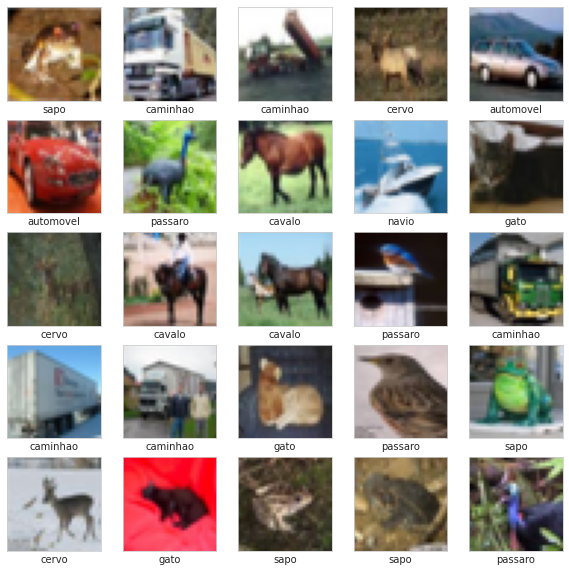

In [4]:
class_names = ['aviao', 'automovel', 'passaro', 'gato', 'cervo',
               'cao', 'sapo', 'cavalo', 'navio', 'caminhao']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [42]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10))


In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

In [44]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20,
                    validation_split=0.1,
                    #validation_data=(test_images, test_labels),
                    )

Epoch 1/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.7275 - accuracy: 0.3575 - val_loss: 1.4029 - val_accuracy: 0.5074
Epoch 2/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.3399 - accuracy: 0.5215 - val_loss: 1.1582 - val_accuracy: 0.5892
Epoch 3/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1802 - accuracy: 0.5841 - val_loss: 1.0486 - val_accuracy: 0.6256
Epoch 4/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0788 - accuracy: 0.6212 - val_loss: 0.9581 - val_accuracy: 0.6644
Epoch 5/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0024 - accuracy: 0.6514 - val_loss: 0.9976 - val_accuracy: 0.6544
Epoch 6/20
1407/1407 [==============================] - 5s 4ms/step - loss: 0.9442 - accuracy: 0.6713 - val_loss: 0.9060 - val_accuracy: 0.6848
Epoch 7/20
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8921 - accuracy: 0.6898 - val_loss: 0.8889 - val_accuracy:

313/313 - 1s - loss: 0.9617 - accuracy: 0.7090


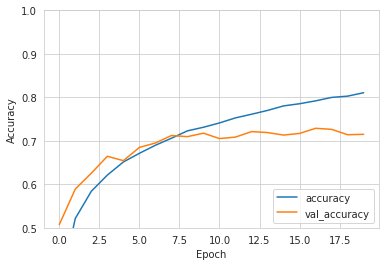

In [49]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [50]:
y_pred = model.predict_classes(test_images)

In [75]:
import itertools

def plot_conf_matrix(conf_matrix, title, ax):  
    cax = ax.matshow(conf_matrix, cmap='magma')

    thresh = 200
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):   
            ax.text(
                j, i, '{:,}'.format(conf_matrix[i, j]),
                horizontalalignment='center',
                fontsize=14,
                color='black' if conf_matrix[i, j] > thresh else 'white'
            )
    
    fig.colorbar(cax, ax=ax)
    labels = class_names
    ax.set_xticks(range(len(labels)));
    ax.set_yticks(range(len(labels)));
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticklabels(labels)
    

    accuracy = np.trace(conf_matrix) / float(np.sum(conf_matrix))
    misclass = 1 - accuracy
    ax.set_title(f'{title}\nAccuracy: {accuracy*100:0.2f}%\n')

    ax.set_xlabel('Predicted')
    ax.set_ylabel('Ground Truth')

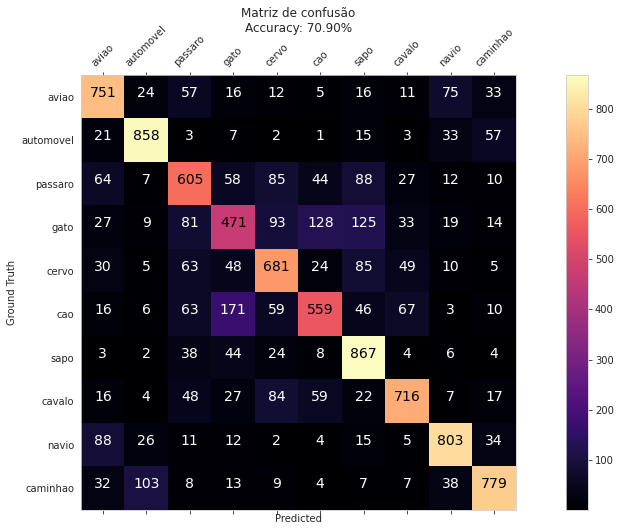

In [77]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_labels, y_pred)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
plt.grid(False)

plot_conf_matrix(conf_matrix, "Matriz de confusão", axes)